In [3]:
# Importing all the necessary libraries
import os
from datetime import datetime
import csv
import pandas as pd
import matplotlib.pyplot as plt

File Setup function

In [50]:
# Function to setup file
file_name = "Expenses.csv"
def setup():
    if not os.path.exists(file_name):
        with open(file_name,'w',newline="") as file:
            writer = csv.writer(file)
            writer.writerow(['Date','Expense/Income','Category','Payment Method','Amount','Balance'])
setup()
df = pd.read_csv(file_name)
print(df.head())

Empty DataFrame
Columns: [Date, Expense/Income, Category, Payment Method, Amount, Balance]
Index: []


Expense Function

In [4]:
# Expense function 
def expenses():
    EXPENSE_CATEGORIES = {
        1: "Food", 2: "Transport", 3: "Housing", 4: "Entertainment",
        5: "Shopping", 6: "Health", 7: "Education", 8: "Travel",
        9: "Bills", 10: "Miscellaneous"
    }

    
    PAYMENT_METHODS = {
        1: "Cash",
        2: "Credit Card",
        3: "Debit Card",
        4: "Bank Transfer",
        5: "UPI",
        6: "Mobile Wallet",
        7: "Other"
    }

    global balance
    print("\n" + "="*40)
    print(" 📉 Expense Transaction ")
    print("="*40)
    amount = float(input("Enter the expense amount : "))
    print("\nSelect Category Type : ->")
    for key,value in EXPENSE_CATEGORIES.items():
        print(f'{key} : {value}')
    Category = int(input("\nEnter Category: "))
    category = EXPENSE_CATEGORIES.get(Category,"Misc")
    print("\nSelect Payment Method : ->")
    for key,value in PAYMENT_METHODS.items():
        print(f'{key} : {value}')
    payment_method = int(input("\nEnter Payment Method: "))
    method = PAYMENT_METHODS.get(payment_method,'Confidential')

    if amount > balance:
        print("Insufficient Funds available in bank")
    
    balance -=  amount
    date = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    with open(file_name,'a',newline="") as file:
        writer = csv.writer(file)
        writer.writerow([date,'Expense',category,method,amount,balance])
    
    # Display Summary
    print("\n-------------------------")
    print(" ✅ Expense Recorded! ")
    print("-------------------------")
    print(f" Amount        : ₹{amount:.2f}")
    print(f" Category      : {category}")
    print(f" Payment Mode  : {method}")
    print(f" Remaining Bal : ₹{balance:.2f}")
    print("-------------------------\n")

#### INCOME FUNCTION

In [13]:
# Income funciton

def income():
    INCOME_CATEGORIES = {
    1: "Salary", 2: "Freelance", 3: "Investments", 4: "Gifts",
    5: "Rental Income", 6: "Business Income", 7: "Other"
}
    global balance
    print("\n" + "="*40)
    print(" 💰 Income Transaction ")
    print("="*40)
    date = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    amount = float(input("\nEnter income: "))
    print("\nSelect Income Category : ->")
    for key, value in INCOME_CATEGORIES.items():
        print(f"{key}: {value}")
    category = int(input("\nEnter Income Category: "))
    income_category = INCOME_CATEGORIES.get(category, "Other")
    
    
    balance += amount
    file_name = "Expenses.csv"

    with open(file_name,'a',newline="") as file:
        writer = csv.writer(file)
        writer.writerow([date,'Income',income_category,'Bank to Bank',amount,balance])
    
      # Display Summary
    print("\n-------------------------")
    print(" ✅ Income Recorded! ")
    print("-------------------------")
    print(f" Amount        : ₹{amount:.2f}")
    print(f" Source       : {income_category}")
    print(f" New Balance  : ₹{balance:.2f}")
    print("-------------------------\n")

#### DISPLAYING ALL TRANSACTIONS

In [6]:
# Displaying all the transactions
def transcations_list():
    try:
        dataframe = pd.read_csv('Expenses.csv')
        if dataframe.empty:
            print("Transaction list is empty. Please make transactions to view the list")
            return 
        
        print("\n" + "="*75)
        print(" 📜 TRANSACTION LIST ".center(75))
        print("="*75)

        # Define column widths
        col_widths = {
            "Date": 20, "Expense/Income": 15, "Category": 15, 
            "Payment Method": 20, "Amount": 10, "Balance": 10
        }

        # Print headers
        print(f"{'Date'.ljust(col_widths['Date'])} | {'Type'.ljust(col_widths['Expense/Income'])} | "
              f"{'Category'.ljust(col_widths['Category'])} | {'Payment Method'.ljust(col_widths['Payment Method'])} | "
              f"{'Amount'.rjust(col_widths['Amount'])} | {'Balance'.rjust(col_widths['Balance'])}")
        print("-" * 75)

        # Print each row
        for _, row in dataframe.iterrows():
            print(f"{str(row['Date']).ljust(col_widths['Date'])} | {row['Expense/Income'].ljust(col_widths['Expense/Income'])} | "
                  f"{row['Category'].ljust(col_widths['Category'])} | {row['Payment Method'].ljust(col_widths['Payment Method'])} | "
                  f"{str(row['Amount']).rjust(col_widths['Amount'])} | {str(row['Balance']).rjust(col_widths['Balance'])}")

        print("="*75 + "\n")

    except FileNotFoundError:
        print("\n❌ File does not exist. No transactions recorded yet.\n")

#### DISPLAY EXPENSE TRANSACTION

In [7]:
# Display expense transactions
def expense_transaction():
    try:
        dataframe = pd.read_csv('Expenses.csv')
        if dataframe.empty:
            print("transcations list is empty. Please make transactions to view the list")
            return
        
        expenses_list = dataframe[dataframe['Expense/Income'] == 'Expense']

        if expenses_list.empty:
            print("\n⚠️  Expenses transaction list is empty. Please add expense transactions.\n")
            return

        print("\n" + "="*75)
        print(" 💰 EXPENSE TRANSACTIONS ".center(75))
        print("="*75)

        # Define column widths
        col_widths = {
            "Date": 20, "Category": 15, "Payment Method": 20, "Amount": 10, "Balance": 10
        }

        # Print headers
        print(f"{'Date'.ljust(col_widths['Date'])} | {'Category'.ljust(col_widths['Category'])} | "
              f"{'Payment Method'.ljust(col_widths['Payment Method'])} | "
              f"{'Amount'.rjust(col_widths['Amount'])} | {'Balance'.rjust(col_widths['Balance'])}")
        print("-" * 75)

        # Print each expense row
        for _, row in expenses_list.iterrows():
            print(f"{str(row['Date']).ljust(col_widths['Date'])} | {row['Category'].ljust(col_widths['Category'])} | "
                  f"{row['Payment Method'].ljust(col_widths['Payment Method'])} | "
                  f"{str(row['Amount']).rjust(col_widths['Amount'])} | {str(row['Balance']).rjust(col_widths['Balance'])}")

        print("="*75 + "\n")

    except FileNotFoundError:
        print("\n❌ File does not exist. No transactions recorded yet.\n")

#### INCOME TRANSACTION

In [8]:
# Display Income transactions
def income_transaction():
    try:
        dataframe = pd.read_csv('Expenses.csv')
        if dataframe.empty:
            print("transcations list is empty. Please make transactions to view the list")
            return
        
        income_list = dataframe[dataframe['Expense/Income'] == 'Income']

        if income_list.empty:
            print("\n⚠️  Income transaction list is empty. Please add income transactions.\n")
            return

        print("\n" + "="*75)
        print(" 💰 INCOME TRANSACTIONS ".center(75))
        print("="*75)

        # Define column widths
        col_widths = {
            "Date": 20, "Category": 15, "Payment Method": 20, "Amount": 10, "Balance": 10
        }

        # Print headers
        print(f"{'Date'.ljust(col_widths['Date'])} | {'Category'.ljust(col_widths['Category'])} | "
              f"{'Payment Method'.ljust(col_widths['Payment Method'])} | "
              f"{'Amount'.rjust(col_widths['Amount'])} | {'Balance'.rjust(col_widths['Balance'])}")
        print("-" * 75)

        # Print each income row
        for _, row in income_list.iterrows():
            print(f"{str(row['Date']).ljust(col_widths['Date'])} | {row['Category'].ljust(col_widths['Category'])} | "
                  f"{row['Payment Method'].ljust(col_widths['Payment Method'])} | "
                  f"{str(row['Amount']).rjust(col_widths['Amount'])} | {str(row['Balance']).rjust(col_widths['Balance'])}")

        print("="*75 + "\n")

    except FileNotFoundError:
        print("\n❌ File does not exist. No transactions recorded yet.\n")

#### EXPENSE CATEGORY TRANSACTIONS

In [9]:
# display expense_category_transactions
def expense_category_transactions():
    try:
        dataframe = pd.read_csv('Expenses.csv')
        if dataframe.empty:
            print("Transaction list is empty. Please make transactions to view the list")
            return
        
        expense_category = dataframe[dataframe['Expense/Income'] == 'Expense']

        if expense_category.empty:
            print("\n⚠️  Expense transaction list is empty. Please add expense transactions.\n")
            return

        # Grouping expenses by category
        category_summary = expense_category.groupby('Category')['Amount'].sum().reset_index()

        print("\n" + "="*65)
        print(" 📊 EXPENSES BY CATEGORY ".center(65))
        print("="*65)

        # Define column widths
        col_widths = {
            "Category": 25, "Total Amount": 15
        }

        # Print headers
        print(f"{'Category'.ljust(col_widths['Category'])} | {'Total Amount'.rjust(col_widths['Total Amount'])}")
        print("-" * 65)

        # Print each category row
        for _, row in category_summary.iterrows():
            print(f"{row['Category'].ljust(col_widths['Category'])} | {str(row['Amount']).rjust(col_widths['Total Amount'])}")

        print("="*65 + "\n")

    except FileNotFoundError:
        print("\n❌ File not found. No transactions recorded yet.\n")



#### INCOME CATEGORY TRANSACTIONS

In [10]:
# Display income category transactions
def income_category_transactions():
    try:
        dataframe = pd.read_csv('Expenses.csv')
        if dataframe.empty:
            print("Transaction list is empty. Please make transactions to view the list")
            return
        
        income_category = dataframe[dataframe['Expense/Income'] == 'Income']

        if income_category.empty:
            print("\n⚠️  Income transaction list is empty. Please add income transactions.\n")
            return

        # Grouping income by category
        category_summary = income_category.groupby('Category')['Amount'].sum().reset_index()

        print("\n" + "="*65)
        print(" 💰 INCOME BY CATEGORY ".center(65))
        print("="*65)

        # Define column widths
        col_widths = {
            "Category": 25, "Total Amount": 15
        }

        # Print headers
        print(f"{'Category'.ljust(col_widths['Category'])} | {'Total Amount'.rjust(col_widths['Total Amount'])}")
        print("-" * 65)

        # Print each category row
        for _, row in category_summary.iterrows():
            print(f"{row['Category'].ljust(col_widths['Category'])} | {str(row['Amount']).rjust(col_widths['Total Amount'])}")

        print("="*65 + "\n")

    except FileNotFoundError:
        print("\n❌ File not found. No transactions recorded yet.\n")

#### VISUALIZATIONS

In [15]:

file_name = "Expenses.csv"
# Visualization 1: Income vs Expense
def income_vs_expense():
    dataframe = pd.read_csv(file_name)
    if dataframe.empty:
        print("Transaction list is empty. Please make transactions to view the list")
        return
    
    income_expense = dataframe.groupby('Expense/Income')['Amount'].sum().reset_index()
    plt.figure(figsize=(10, 5))
    plt.bar(income_expense['Expense/Income'], income_expense['Amount'], color=['green', 'red'])
    plt.title('Income vs Expense')
    plt.xlabel('Type')
    plt.ylabel('Amount')
    plt.show()

# Visualization 2: Expense by categories
def expense_by_categories():
    dataframe = pd.read_csv(file_name)
    if dataframe.empty:
        print("Transaction list is empty. Please make transactions to view the list")
        return
    
    expense_category = dataframe[dataframe['Expense/Income'] == 'Expense']
    if expense_category.empty:
        print("Expense transaction list is empty. Please add expense transactions")
        return
    
    category = expense_category.groupby('Category')['Amount'].sum().reset_index()
    plt.figure(figsize=(10, 5))
    plt.bar(category['Category'], category['Amount'], color='blue')
    plt.title('Expense by Categories')
    plt.xlabel('Category')
    plt.ylabel('Amount')
    plt.xticks(rotation=45)
    plt.show()

# Visualization 3: Expense by months
def expense_by_months():
    dataframe = pd.read_csv(file_name)
    if dataframe.empty:
        print("Transaction list is empty. Please make transactions to view the list")
        return
    
    dataframe['Date'] = pd.to_datetime(dataframe['Date'])
    dataframe['Month'] = dataframe['Date'].dt.to_period('M')
    expense_month = dataframe[dataframe['Expense/Income'] == 'Expense']
    if expense_month.empty:
        print("Expense transaction list is empty. Please add expense transactions")
        return
    
    month = expense_month.groupby('Month')['Amount'].sum().reset_index()
    plt.figure(figsize=(10, 5))
    plt.plot(month['Month'].astype(str), month['Amount'], marker='o', color='purple')
    plt.title('Expense by Months')
    plt.xlabel('Month')
    plt.ylabel('Amount')
    plt.xticks(rotation=45)
    plt.show()

# Visualization 4: Income by categories
def income_by_categories():
    dataframe = pd.read_csv(file_name)
    if dataframe.empty:
        print("Transaction list is empty. Please make transactions to view the list")
        return
    
    income_category = dataframe[dataframe['Expense/Income'] == 'Income']
    if income_category.empty:
        print("Income transaction list is empty. Please add income transactions")
        return
    
    category = income_category.groupby('Category')['Amount'].sum().reset_index()
    plt.figure(figsize=(10, 5))
    plt.bar(category['Category'], category['Amount'], color='orange')
    plt.title('Income by Categories')
    plt.xlabel('Category')
    plt.ylabel('Amount')
    plt.xticks(rotation=45)
    plt.show()

#### MAIN FUNCTION


              📌 EXPENSE TRACKER MENU              
 1. 💸 Make a Transaction
 2. 📜 Display All Transactions
 3. 📉 Display Only Expense Transactions
 4. 📈 Display Only Income Transactions
 5. 📊 Display Expenses by Categories
 6. 📂 Display Income by Categories
 7. 📊 Generate Visualization Reports
 8. ❓ Help (Operations List)
 0. 🚪 Exit Application


--------------------------------------------------
             📊 VISUALIZATION OPTIONS              
--------------------------------------------------
 1. 📊 Income vs Expense
 2. 📌 Expense by Categories
 3. 📆 Expense by Months
 4. 📂 Income by Categories
--------------------------------------------------


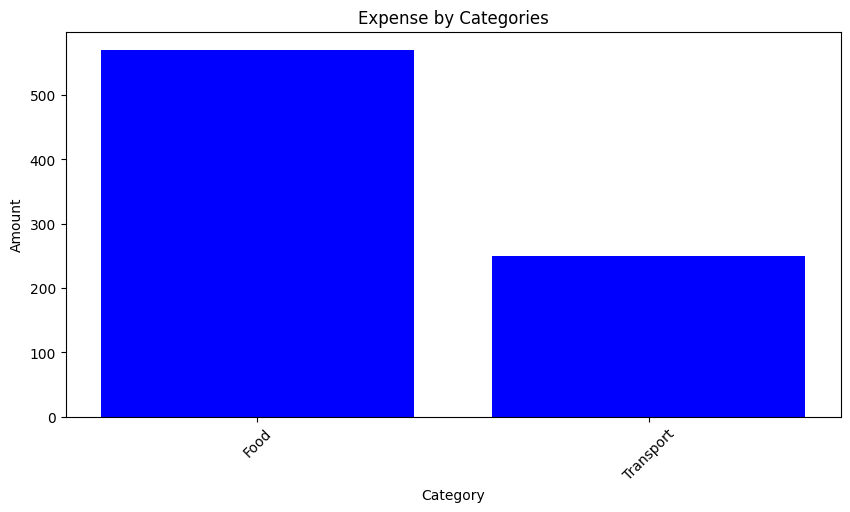



              📌 EXPENSE TRACKER MENU              
 1. 💸 Make a Transaction
 2. 📜 Display All Transactions
 3. 📉 Display Only Expense Transactions
 4. 📈 Display Only Income Transactions
 5. 📊 Display Expenses by Categories
 6. 📂 Display Income by Categories
 7. 📊 Generate Visualization Reports
 8. ❓ Help (Operations List)
 0. 🚪 Exit Application


📌 Available Operations:
 1. 💸 Make a Transaction
 2. 📜 Display All Transactions
 3. 📉 Display Only Expense Transactions
 4. 📈 Display Only Income Transactions
 5. 📊 Display Expenses by Categories
 6. 📂 Display Income by Categories
 7. 📊 Generate Visualization Reports
 8. ❓ Help (Operations List)
 0. 🚪 Exit Application



              📌 EXPENSE TRACKER MENU              
 1. 💸 Make a Transaction
 2. 📜 Display All Transactions
 3. 📉 Display Only Expense Transactions
 4. 📈 Display Only Income Transactions
 5. 📊 Display Expenses by Categories
 6. 📂 Display Income by Categories
 7. 📊 Generate Visualization Reports
 8. ❓ Help (Operations List)
 0

In [16]:
# Main function 

'''
Main functions to work on for now
1. Ask user what operation would they like to do
2. Operations users are allowed to do
    1. Make Transcations
        1. Income or Expense
    2. Display all the transcations
    3. Display only the expense transcations
    4. Display only the income transcations
    5. Display expense categories transactions
    6. Display income categoeis transcations
    7. Visualizations : 
        1. Income vs expense
        2. Expense by categories
        3. Expense by months
        4. Income by categories

    2,3,4,5,6 - Work with pandas
    7 - work with matplotlib
'''

# Balance Variable
balance = 10000

# Define available operations
operations = {
    1: "💸 Make a Transaction",
    2: "📜 Display All Transactions",
    3: "📉 Display Only Expense Transactions",
    4: "📈 Display Only Income Transactions",
    5: "📊 Display Expenses by Categories",
    6: "📂 Display Income by Categories",
    7: "📊 Generate Visualization Reports",
    8: "❓ Help (Operations List)",
    0: "🚪 Exit Application"
}

# Define visualization options
visualizations = {
    1: "📊 Income vs Expense",
    2: "📌 Expense by Categories",
    3: "📆 Expense by Months",
    4: "📂 Income by Categories"
}

# Function to display operations menu
def display_menu():
    print("\n" + "="*50)
    print(" 📌 EXPENSE TRACKER MENU ".center(50))
    print("="*50)
    for key, value in operations.items():
        print(f" {key}. {value}")
    print("="*50 + "\n")

# Function to display transaction options
def transaction_menu():
    print("\n" + "-"*40)
    print(" 🔄 TRANSACTION MENU ".center(40))
    print("-"*40)
    print(" 1. 💰 Income")
    print(" 2. 💸 Expense")
    print("-"*40)
    return int(input(" 👉 Choose a transaction type (1/2): "))

# Function to display visualization options
def visualization_menu():
    print("\n" + "-"*50)
    print(" 📊 VISUALIZATION OPTIONS ".center(50))
    print("-"*50)
    for key, value in visualizations.items():
        print(f" {key}. {value}")
    print("-"*50)
    return int(input(" 👉 Choose a visualization type: "))

# Main CLI Loop
while True:
    display_menu()
    try:
        user_input = int(input("👉 Select an option: "))

        if user_input == 1:
            user_choice = transaction_menu()
            if user_choice == 1:
                income()
            elif user_choice == 2:
                expenses()
            else:
                print("❌ Invalid choice! Please enter 1 or 2.")

        elif user_input == 2:
            transcations_list()
        elif user_input == 3:
            expense_transaction()
        elif user_input == 4:
            income_transaction()
        elif user_input == 5:
            expense_category_transactions()
        elif user_input == 6:
            income_category_transactions()
        elif user_input == 7:
            vis_choice = visualization_menu()
            if vis_choice == 1:
                income_vs_expense()
            elif vis_choice == 2:
                expense_by_categories()
            elif vis_choice == 3:
                expense_by_months()
            elif vis_choice == 4:
                income_by_categories()
            else:
                print("❌ Invalid choice! Please enter a valid option.")

        elif user_input == 8:
            print("\n📌 Available Operations:")
            for key, value in operations.items():
                print(f" {key}. {value}")
            print()

        elif user_input == 0:
            print("\n🚀 Thank you for using the Expense Tracker! Goodbye! 👋\n")
            break

        else:
            print("\n❌ Access Denied! Invalid option. Please select from the menu.\n")

    except ValueError:
        print("\n❌ Invalid input! Please enter a number.\n")

    print()
